###### NAME : 
###### NET ID :
###### SUBMISSION DATE :

### Instructions for submission

# HOW TO DO THE ASSIGNMENT?

```
>> Download this jupyter notebook file to your local computer.
>> Rename it by adding your netid. 'CS4347-Assighnment4-NetId.ipynb
>> Now start working on assignment
```

# HOW TO SUBMIT THE ASSIGNMENT?

```
>> Before you submit make sure you have the final version of your work.
>> Submit the jupyter notebook ('CS4347-Assighnment4-NetId.ipynb) with all cells' running results to Canvas.
>> Save the jupyter notebook with all cells' running results as a pdf, submit the pdf file to Canvas as well.   


# ASSIGNMENT 4 - INTRO TO MACHINE LEARNING - Nerual Networks


> **FULL MARKS = 120 points**



In this assignment we will ...

In [47]:
# import all the packages that you will need during this assignment.
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

### Exercise 1: Neural Networks for Handwritten Digit Recognition, Binary
In this exercise, you will use a neural network to recognize the hand-written digits zero and one.

### Neural Networks

Previously, you implemented logistic regression. This was extended to handle non-linear boundaries using polynomial regression. For even more complex scenarios such as image recognition, neural networks are preferred.

#### Problem Statement

In this exercise, you will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. You will extend this network to recognize all 10 digits (0-9) in a future assignment. 

This exercise will show you how the methods you have learned can be used for this classification task.

#### Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 1000 training examples of handwritten digits $^1$, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training example becomes a single row in our data matrix `X`. 
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [48]:
def load_data():
    X = np.load("data_ex1/X.npy")
    y = np.load("data_ex1/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

In [49]:
# load dataset
X, y = load_data()

#### View the variables
Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints elements of the variables `X` and `y`.  

In [50]:
print ('The first element of X is: ', X[0])
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [51]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


#### Visualizing the Data

You will begin by visualizing a subset of the training set. 
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

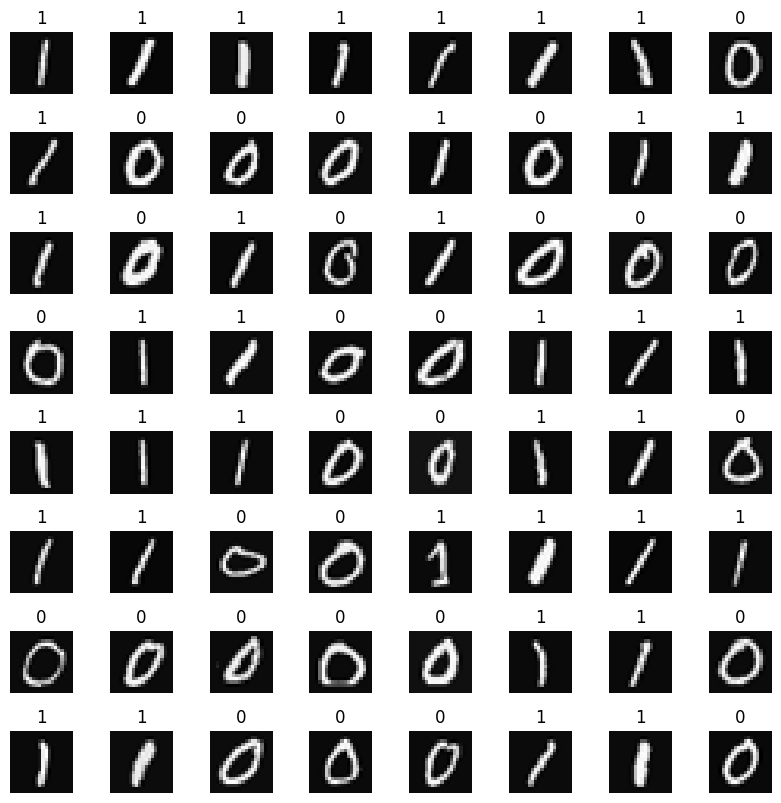

In [52]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
plt.show()

### Exercise 1 [20 points]

Below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a sigmoid activation to construct the network described below.

- The neural network has three dense layers with sigmoid activations.
- Since the images are of size $20\times20$, this gives us $400$ inputs  
- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3. 

In [53]:
# GRADED CELL: Sequential model

model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(400,)),
        Dense(25, activation="sigmoid", name="layer1"),
        Dense(15, activation="sigmoid", name="layer2"),
        Dense(1, activation="sigmoid", name="layer3")
        ### END CODE HERE ### 
    ], name = "my_model" 
)                            


In [54]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

<details>
  <summary><font size="3" color="darkgreen"><b>Expected Output (Click to Expand) </b></font></summary>
The `model.summary()` function displays a useful summary of the model. Because we have specified an input layer size, the shape of the weight and bias arrays are determined and the total number of parameters per layer can be shown. Note, the names of the layers may vary as they are auto-generated.  
    
    
```
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense (Dense)                (None, 25)                10025     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
=================================================================
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________
```

The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [55]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [56]:
[layer1, layer2, layer3] = model.layers

In [57]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [58]:
print(model.layers[2].weights)

[<Variable path=my_model/layer3/kernel, shape=(15, 1), dtype=float32, value=[[ 0.4491232 ]
 [-0.0729351 ]
 [-0.21013978]
 [-0.26162514]
 [ 0.00764054]
 [-0.32960477]
 [ 0.60828525]
 [ 0.04044491]
 [-0.21457413]
 [ 0.3757875 ]
 [ 0.21734071]
 [ 0.39721137]
 [-0.15484482]
 [ 0.10201937]
 [-0.38693586]]>, <Variable path=my_model/layer3/bias, shape=(1,), dtype=float32, value=[0.]>]


The following code will define a loss function and run gradient descent to fit the weights of the model to the training data. 

In [59]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6749   
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5231 
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3889 
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2790 
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2018 
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1509 
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1172 
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0942 
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0779 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0658 
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.0567
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.0497
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.0442
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.0398
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.0

To run the model on an example to make a prediction, use [Keras `predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). The input to `predict` is an array so the single example is reshaped to be two dimensional.

In [60]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
 predicting a zero: [[0.01557071]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
 predicting a one:  [[0.97938555]]


The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. 
In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.
As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [61]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

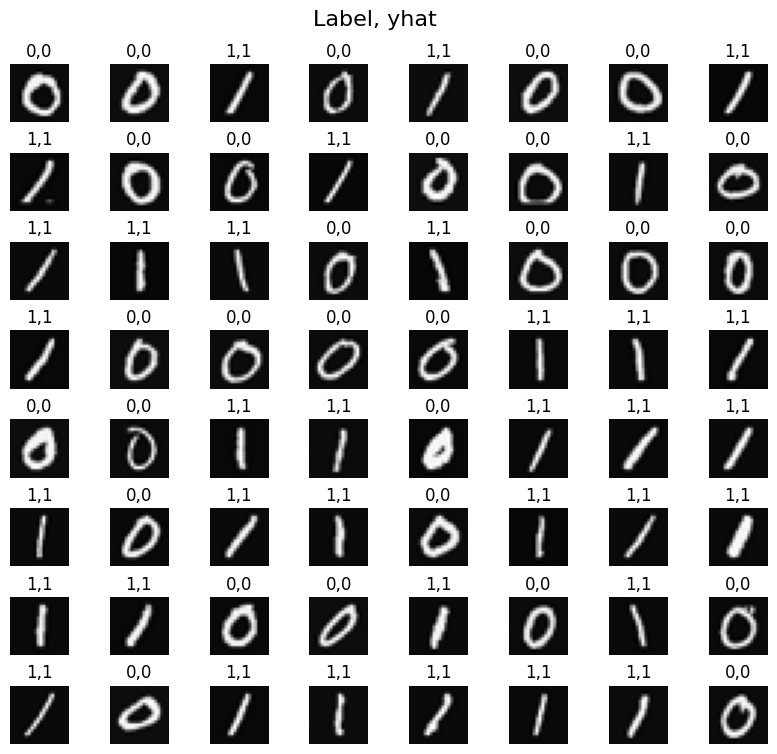

In [62]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

### Exercise 2:Neural Networks for Handwritten Digit Recognition, Multiclass
In this exercise, you will use a neural network to recognize the hand-written digits 0-9.

In [63]:
from tensorflow.keras.activations import linear, relu, sigmoid

#### Softmax Function
A multiclass neural network generates N outputs. One output is selected as the predicted answer. In the output layer, a vector $\mathbf{z}$ is generated by a linear function which is fed into a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will sum to 1. They can be interpreted as probabilities. The larger inputs to the softmax will correspond to larger output probabilities.

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=0}^{N-1}{e^{z_k} }} \tag{1}$$

Where $z = \mathbf{w} \cdot \mathbf{x} + b$ and N is the number of feature/categories in the output layer.  

#### Exercise 2.1 [10 points]
Let's create a NumPy implementation of softmax function:

In [64]:
def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    ### START CODE HERE ### 
    z_x = np.exp(z - np.max(z))
    a = z_x / np.sum(z_x)
    ### END CODE HERE ### 
    return a

In [65]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")
print("my_softmax(z) and tensorflow softmax(z) should provide the same results")

my_softmax(z):         [0.0320586  0.08714432 0.23688282 0.64391426]
tensorflow softmax(z): [0.0320586  0.08714432 0.23688282 0.64391426]
my_softmax(z) and tensorflow softmax(z) should provide the same results


In [66]:
print(f"The sum of my_softmax(z) is {sum(a)}")
print(f"The sum of tensorflow softmax(z) is {sum(atf)}")

The sum of my_softmax(z) is 1.0
The sum of tensorflow softmax(z) is 1.0


### Neural Networks

In Exercise 1, you implemented a neural network to do binary classification. In Exercise 2 you will extend that to multiclass classification. This will utilize the softmax activation.


#### Problem Statement

In this exercise, you will use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. 


#### Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 5000 training examples of handwritten digits $^1$.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training examples becomes a single row in our data matrix `X`. 
        - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [67]:
def load_data():
    X = np.load("data_ex2/X.npy")
    y = np.load("data_ex2/y.npy")
    return X, y

In [68]:
# load dataset
X, y = load_data()

In [69]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [70]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


In [71]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


#### Visualizing the Data

You will begin by visualizing a subset of the training set. 
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

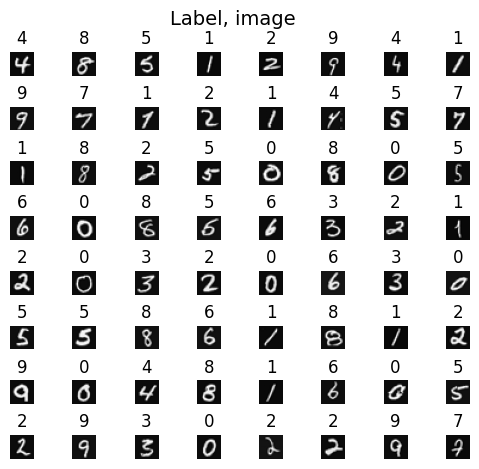

In [75]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

### Exercise 2.2 [20 points]

Below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a ReLU activation to construct the three layer network described below.

- The neural network has two dense layers with ReLU activations followed by an output layer with a linear activation.
- Since the images are of size $20\times20$, this gives us $400$ inputs  
- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $10$ output units in layer 3, one for each digit.

In [78]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(400,)),
        Dense(25, activation="relu", name="layer1"),
        Dense(15, activation="relu", name="layer2"),
        Dense(10, activation="linear", name="outputLayer")
        ### END CODE HERE ### 
    ], name = "my_model" 
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

#### Softmax placement
As described in the lecture and the optional softmax lab, numerical stability is improved if the softmax is grouped with the loss function rather than the output layer during training. This has implications when *building* the model and *using* the model.  
Building:  
* The final Dense layer should use a 'linear' activation. This is effectively no activation. 
* The `model.compile` statement will indicate this by including `from_logits=True`.
`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) `  
* This does not impact the form of the target. In the case of SparseCategorialCrossentropy, the target is the expected digit, 0-9.

Using the model:
* The outputs are not probabilities. If output probabilities are desired, apply a softmax function.

In [79]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

<details>
  <summary><font size="3" color="darkgreen"><b>Expected Output (Click to expand)</b></font></summary>
The `model.summary()` function displays a useful summary of the model. Note, the names of the layers may vary as they are auto-generated unless the name is specified.    
    
```
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 25)                10025     
_________________________________________________________________
L2 (Dense)                   (None, 15)                390       
_________________________________________________________________
L3 (Dense)                   (None, 10)                160       
=================================================================
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________
```

In [80]:
[layer1, layer2, layer3] = model.layers

In [81]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


The following code:
* defines a loss function, `SparseCategoricalCrossentropy` and indicates the softmax should be included with the  loss calculation by adding `from_logits=True`)
* defines an optimizer. A popular choice is Adaptive Moment (Adam) which was described in lecture.

In [82]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=100
)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 1.8681 
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 0.6610
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.4437
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 0.3653
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.3187
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.2857
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.2601
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 0.2396
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.2220
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.2074
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.1949
Epoch 12/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.1838
Epoch 13/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 0.1736
Epoch 14/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.1646
Epoch 15/100
1

#### Epochs and batches
In the `compile` statement above, the number of `epochs` was set to 100. This specifies that the entire data set should be applied during training 100 times.  During training, you see output describing the progress of training that looks like this:
```
Epoch 1/100
157/157 [==============================] - 0s 1ms/step - loss: 2.2770
```
The first line, `Epoch 1/100`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 5000 examples in our data set or roughly 157 batches. The notation on the 2nd line `157/157 [====` is describing which batch has been executed.

#### Loss  (cost)
In the class, we learned to track the progress of gradient descent by monitoring the cost. Ideally, the cost will decrease as the number of iterations of the algorithm increases. Tensorflow refers to the cost as `loss`. Above, you saw the loss displayed each epoch as `model.fit` was executing. The [.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model) method returns a variety of metrics including the loss. This is captured in the `history` variable above. This can be used to examine the loss in a plot as shown below.

In [83]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

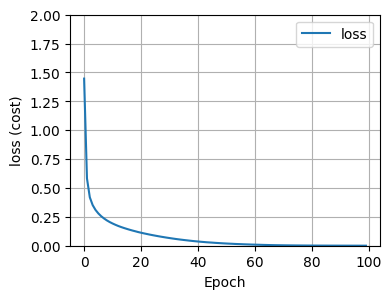

In [84]:
plot_loss_tf(history)

#### Prediction 
To make a prediction, use Keras `predict`. Below, X[1015] contains an image of a two.

In [85]:
def display_digit(X):
    """ display a single digit. The input is one digit (400,). """
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    X_reshaped = X.reshape((20,20)).T
    # Display the image
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()

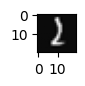

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
 predicting a Two: 
[[-10.7005       4.8022423   11.940644     0.25595793 -15.865273
   -5.9875355  -17.10808      3.203707    -9.729481   -14.672356  ]]
 Largest Prediction index: 2


In [86]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

The largest output is prediction[2], indicating the predicted digit is a '2'. If the problem only requires a selection, that is sufficient. Use NumPy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to select it. If the problem requires a probability, a softmax is required:

In [87]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.4677708e-10 7.9325604e-04 9.9903798e-01 8.4137009e-06 8.3873614e-13
  1.6348279e-08 2.4203656e-13 1.6039037e-04 3.8758474e-10 2.7650529e-12]]
Total of predictions: 1.000


To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function.

In [88]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

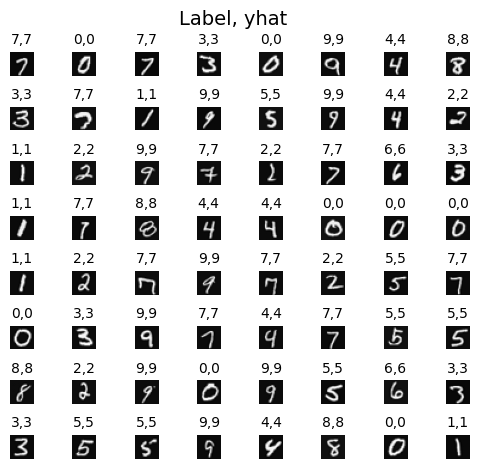

In [89]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [90]:
def display_errors(model,X,y):
    f = model.predict(X)
    yhat = np.argmax(f, axis=1)
    doo = yhat != y[:,0]
    idxs = np.where(yhat != y[:,0])[0]
    if len(idxs) == 0:
        print("no errors found")
    else:
        cnt = min(8, len(idxs))
        fig, ax = plt.subplots(1,cnt, figsize=(5,1.2))
        fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]

        for i in range(cnt):
            j = idxs[i]
            X_reshaped = X[j].reshape((20,20)).T

            # Display the image
            ax[i].imshow(X_reshaped, cmap='gray')

            # Predict using the Neural Network
            prediction = model.predict(X[j].reshape(1,400))
            prediction_p = tf.nn.softmax(prediction)
            yhat = np.argmax(prediction_p)

            # Display the label above the image
            ax[i].set_title(f"{y[j,0]},{yhat}",fontsize=10)
            ax[i].set_axis_off()
            fig.suptitle("Label, yhat", fontsize=12)
    return(len(idxs))

In [91]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
no errors found
0 errors out of 5000 images


### Exercise 3 [70 points]
Below you will build and train five additional models using variations of the provided base code. Each model will have at least one significant difference in architecture, hyperparameters, or training approach. After training, compare the models’ performance on the test set to see how these changes affect accuracy and generalization.

In [100]:
#reload the data
def load_data():
    X = np.load("data_ex2/X.npy")
    y = np.load("data_ex2/y.npy")
    return X, y
X,y = load_data()
print(X.shape)
print(y.shape)

(5000, 400)
(5000, 1)


In [101]:
# Let's shuffle the data and get 80% and training set and 20% as testing set
# Suppose X is shape (5000, 400) and y is shape (5000, 1)
indices = np.arange(len(X))        # Create an array of indices [0..4999]
np.random.shuffle(indices)         # Shuffle the indices in-place

# Reorder X and y according to the shuffled indices
X_shuffled = X[indices]
y_shuffled = y[indices]

# Calculate the split point (80% = 0.8)
split_index = int(0.8 * len(X_shuffled))

# Create the train/test splits
X_train = X_shuffled[:split_index]
y_train = y_shuffled[:split_index]
X_test  = X_shuffled[split_index:]
y_test  = y_shuffled[split_index:]

#### 3.1 Vary the Number of Hidden Layers [10 points]
Goal: Observe how adding or removing hidden layers impacts training time and performance.

In [102]:
# Additional more hidden layers than the model you build in Exercise 2 
model_1 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(25, activation="relu", name="layer1"),
    Dense(20, activation="relu", name="layer2"),
    Dense(15, activation="relu", name="layer3"),
    Dense(10, activation="linear", name="outputLayer")
], name="model_1")


model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history_1 = model_1.fit(X_train, y_train, epochs=100)


Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - loss: 2.1063 
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.8958
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.4941
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.3945
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.3363
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.2958
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 0.2644
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.2388
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.2159
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.1965
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 0.1800
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.1648
Epoch 13/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.1502
Epoch 14/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.1370
Epoch 15/100
1

#### 3.2 Increase the Number of Units Per Layer [10 points]
Goal: See if a larger model can learn more complex patterns and whether it might overfit.


In [103]:
#add more units(neurons) in each hidden layer on the model that you build in Exercise 2
model_2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(40, activation="relu", name="layer1"),
    Dense(35, activation="relu", name="layer2"),
    Dense(30, activation="relu", name="layer3"),
    Dense(25, activation="linear", name="outputLayer")
], name="model_2")

model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history_2 = model_2.fit(X_train, y_train, epochs=100)


Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - loss: 2.4363 
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.6464
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.3984
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 0.3078
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.2551
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.2169
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.1872
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 0.1630
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1427  
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.1259
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.1114
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.0991
Epoch 13/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.0882
Epoch 14/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.0789
Epoch 15/100
1

#### 3.3 Adjust the Learning Rate [10 points]
Goal: Understand how the learning rate influences convergence speed and final accuracy.


In [105]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((400,)),
    tf.keras.layers.Dense(25, activation="relu", name="L1"),
    tf.keras.layers.Dense(15, activation="relu", name="L2"),
    tf.keras.layers.Dense(10, activation="linear", name="Output")
], name="model_3")

# Lower learning rate to 0.00001
model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
)

history_3 = model_3.fit(X_train, y_train, epochs=100)


Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 2.3414 
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 2.3253
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 2.3114
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 2.2990
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 2.2876
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 2.2768
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 2.2665
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 2.2561
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 2.2457
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 2.2354
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 2.2250
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 2.2141
Epoch 13/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 2.2026
Epoch 14/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 2.1905
Epoch 15/100
1

#### 3.4 Use a Different Number of Epochs [10 points]
Goal: Check if training for fewer or more epochs changes the performance significantly (e.g., underfitting vs. overfitting).

In [107]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((400,)),
    tf.keras.layers.Dense(25, activation="relu", name="L1"),
    tf.keras.layers.Dense(15, activation="relu", name="L2"),
    tf.keras.layers.Dense(10, activation="linear", name="Output")
], name="model_4")

model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

# Train with fewer epochs (e.g., 10)
history_4 = model_4.fit(X_train, y_train, epochs=200)


Epoch 1/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 2.0571 
Epoch 2/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.8658
Epoch 3/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.4903
Epoch 4/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.3805
Epoch 5/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.3227
Epoch 6/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 0.2848
Epoch 7/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.2563
Epoch 8/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 0.2337
Epoch 9/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.2146
Epoch 10/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.1984
Epoch 11/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.1836
Epoch 12/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.1706
Epoch 13/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.1592
Epoch 14/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.1487
Epoch 15/200
1

#### 3.5 Train on a Subset of the Data [10 points]
Goal: Explore how dataset size impacts model training and performance (e.g., does the model overfit more easily on less data?).

In [108]:
subset_indices = np.random.choice(len(X_train), size=int(0.3 * len(X_train)), replace=False)  # 30% subset
X_small = X_train[subset_indices]
y_small = y_train[subset_indices]


In [109]:
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((400,)),
    tf.keras.layers.Dense(25, activation="relu", name="L1"),
    tf.keras.layers.Dense(15, activation="relu", name="L2"),
    tf.keras.layers.Dense(10, activation="linear", name="Output")
], name="model_5")

model_5.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history_5 = model_5.fit(X_small, y_small, epochs=100)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 2.2045 
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 1.7623
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 1.3070
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.9795
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.7679
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.6306
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.5360
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.4678
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.4169
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.3770
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.3447
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.3172
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.2938
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.2731
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s

In [110]:
# Evaluate Model 1
logits_1 = model_1.predict(X_test)
predicted_classes_1 = np.argmax(logits_1, axis=1)
true_classes_1 = y_test.reshape(-1)       # Ensure y_test is 1D
accuracy_1 = np.mean(predicted_classes_1 == true_classes_1)
print(f"Model 1 test accuracy: {accuracy_1:.4f}")

# Evaluate Model 2
logits_2 = model_2.predict(X_test)
predicted_classes_2 = np.argmax(logits_2, axis=1)
true_classes_2 = y_test.reshape(-1)
accuracy_2 = np.mean(predicted_classes_2 == true_classes_2)
print(f"Model 2 test accuracy: {accuracy_2:.4f}")

# Evaluate Model 3
logits_3 = model_3.predict(X_test)
predicted_classes_3 = np.argmax(logits_3, axis=1)
true_classes_3 = y_test.reshape(-1)
accuracy_3 = np.mean(predicted_classes_3 == true_classes_3)
print(f"Model 3 test accuracy: {accuracy_3:.4f}")

# Evaluate Model 4
logits_4 = model_4.predict(X_test)
predicted_classes_4 = np.argmax(logits_4, axis=1)
true_classes_4 = y_test.reshape(-1)
accuracy_4 = np.mean(predicted_classes_4 == true_classes_4)
print(f"Model 4 test accuracy: {accuracy_4:.4f}")

# Evaluate Model 5
logits_5 = model_5.predict(X_test)
predicted_classes_5 = np.argmax(logits_5, axis=1)
true_classes_5 = y_test.reshape(-1)
accuracy_5 = np.mean(predicted_classes_5 == true_classes_5)
print(f"Model 5 test accuracy: {accuracy_5:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model 1 test accuracy: 0.9180
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model 2 test accuracy: 0.9360
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model 3 test accuracy: 0.7450
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model 4 test accuracy: 0.9170
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model 5 test accuracy: 0.8930


#### Question: Though these five models are different in some ways, but their performance might be still similar. Why? [10 points]

The reasons are:
the epochs remain relatively the same alongside the learning rate. In model 3 the learning rate is tiny compared to the epochs allowed so the accuracy is much lower, we will need more steps to increase the accuracy. Aside from that more feature engineering is required to increase the accuracy.


In [111]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

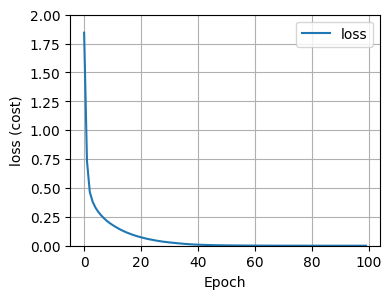

In [112]:
plot_loss_tf(history_1) # Vary the Number of Hidden Layers

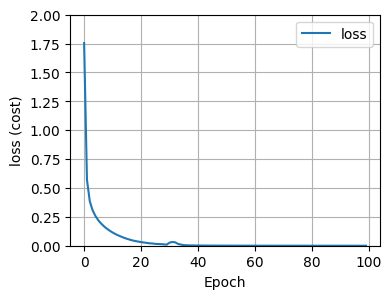

In [113]:
plot_loss_tf(history_2) #Increase the Number of Units Per Layer

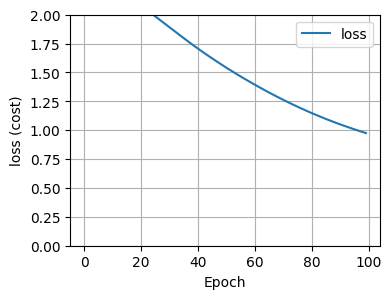

In [114]:
plot_loss_tf(history_3) #Adjust the Learning Rate

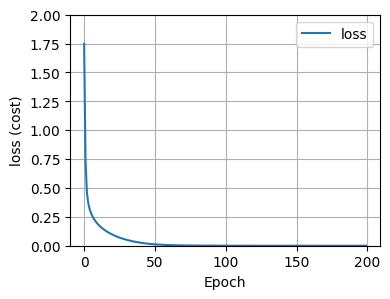

In [115]:
plot_loss_tf(history_4) #Use a Different Number of Epochs

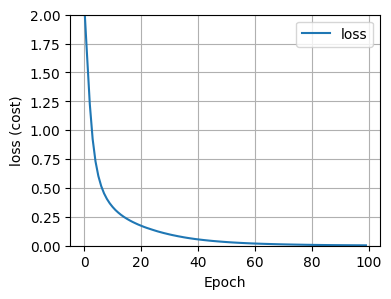

In [116]:
plot_loss_tf(history_5) #Train on a Subset of the Data

#### Question: What you can find from the loss curves of these five models [10 points]

Your answers go below:
The learning rate takes a huge toll on the loss curve. An effective learning rate is critical to the model.